In [1]:
!pip install embedding-as-service

In [2]:
import pandas as pd
# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
# sentence feature extracter
from embedding_as_service.text.encode import Encoder
# light model used
import lightgbm as lgb
# metrics for model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
from google.colab import files
uploaded = files.upload()

Saving ticket_train.csv to ticket_train.csv


In [4]:
from google.colab import files
uploaded = files.upload()

Saving ticket_valid.csv to ticket_valid (1).csv


In [6]:
# importing training dataset
train = pd.read_csv('ticket_train.csv')

# importing validating dataset
valid = pd.read_csv('ticket_valid (1).csv')

In [7]:
glove_en = Encoder(embedding='glove', model='crawl_42B_300')

Model does not exists, Downloading model: crawl_42B_300
[||||||||||||||||||||||||||||||||||||||||||||||||||] 100 % [1833789/1833789 kb]


999it [00:00, 9988.41it/s]

Model downloaded successfully!
Loading Model (this might take few minutes).....


1917494it [03:26, 9291.19it/s]

Model loaded Successfully !


Using Training Dataset

In [8]:
# encoding training dataset
glove_train_vecs = glove_en.encode(texts = list(train['info'].values), pooling='reduce_mean')

In [9]:
glove_train_vecs.shape

(38839, 300)

In [10]:
glove_train_vecs

array([[-0.0061419 , -0.01897392,  0.00116816, ..., -0.00153588,
         0.01191422,  0.0014627 ],
       [ 0.00426677, -0.00944219, -0.00951713, ...,  0.01251738,
        -0.0046565 , -0.0145892 ],
       [ 0.01804876, -0.00423247,  0.0054348 , ..., -0.01528071,
         0.02172892, -0.01350173],
       ...,
       [-0.00168659, -0.02215202,  0.00156873, ..., -0.00124636,
        -0.01249491, -0.00486416],
       [ 0.01267677, -0.02889339, -0.00411813, ..., -0.01243322,
        -0.01885669, -0.00169095],
       [-0.03238924, -0.13021167,  0.02618292, ..., -0.08019241,
         0.00447165, -0.02590714]])

Using Validation Dataset

In [11]:
glove_valid_vecs = glove_en.encode(texts = list(valid['info'].values), pooling='reduce_mean')

In [12]:
glove_valid_vecs.shape

(4855, 300)

In [13]:
glove_train_vecs

array([[-0.0061419 , -0.01897392,  0.00116816, ..., -0.00153588,
         0.01191422,  0.0014627 ],
       [ 0.00426677, -0.00944219, -0.00951713, ...,  0.01251738,
        -0.0046565 , -0.0145892 ],
       [ 0.01804876, -0.00423247,  0.0054348 , ..., -0.01528071,
         0.02172892, -0.01350173],
       ...,
       [-0.00168659, -0.02215202,  0.00156873, ..., -0.00124636,
        -0.01249491, -0.00486416],
       [ 0.01267677, -0.02889339, -0.00411813, ..., -0.01243322,
        -0.01885669, -0.00169095],
       [-0.03238924, -0.13021167,  0.02618292, ..., -0.08019241,
         0.00447165, -0.02590714]])

Model training

In [14]:
clf = lgb.LGBMClassifier(is_unbalance = True) 

In [15]:
clf.fit(glove_train_vecs, train['ticket_type'])

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', is_unbalance=True, learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [16]:
y_valid_preds = clf.predict(glove_valid_vecs)

### **Model Evaulation**

```
This is formatted as code
```



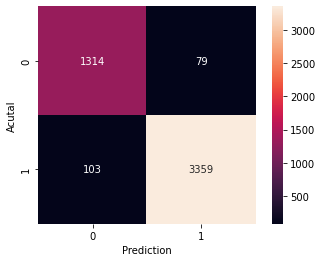

In [17]:
con_mat = confusion_matrix(valid['ticket_type'], y_valid_preds)
sns.heatmap(con_mat, annot=True, fmt='.0f', square=True)
plt.xlabel('Prediction')
plt.ylabel('Acutal')
plt.show()

In [18]:
acc = accuracy_score(valid['ticket_type'], y_valid_preds)
print(f'Model accuracy score = {acc*100:0.2f}%.')

Model accuracy score = 96.25%.


In [19]:
print(classification_report(valid['ticket_type'], y_valid_preds))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1393
           1       0.98      0.97      0.97      3462

    accuracy                           0.96      4855
   macro avg       0.95      0.96      0.95      4855
weighted avg       0.96      0.96      0.96      4855



In [20]:
from sklearn.model_selection import RandomizedSearchCV

### **Hypertuning the model**

In [21]:
params_grid = {'n_estimators' : (10,100,10),
        'max_depth' : [None, 3, 5, 10],
        'criterion' : ['gini', 'entropy']}

In [22]:
clf = lgb.LGBMClassifier(is_unbalance = True)

# creating a hyper-tuned model
ht_clf = RandomizedSearchCV(estimator = clf,
                            param_distributions = params_grid,
                            n_iter = 10,
                            cv = 3,
                            verbose = True)

In [23]:
ht_clf.fit(glove_train_vecs, train['ticket_type'])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            is_unbalance=True,
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, silent=True,
                                            subsample=1.0

In [24]:
ht_clf.best_params_

{'criterion': 'gini', 'max_depth': None, 'n_estimators': 100}

In [25]:
ht_clf.best_score_

0.9628208473693824

### **Initialising Final HyperTuned Model**

In [26]:
final_model = lgb.LGBMClassifier(is_unbalance = True,
                                     criterion = 'entropy',
                                     max_depth = None,
                                     n_estimators = 50)

In [27]:
final_model.fit(glove_train_vecs, train['ticket_type'])

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               criterion='entropy', importance_type='split', is_unbalance=True,
               learning_rate=0.1, max_depth=None, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=50,
               n_jobs=-1, num_leaves=31, objective=None, random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [28]:
from google.colab import files
uploaded = files.upload()

Saving ticket_test.csv to ticket_test (1).csv


In [29]:
test = pd.read_csv('ticket_test (1).csv')

In [30]:
glove_test_vecs = glove_en.encode(texts = list(test['info'].values), pooling='reduce_mean')

In [31]:
y_test_preds = final_model.predict(glove_test_vecs)

## **Final Model Evaluation**

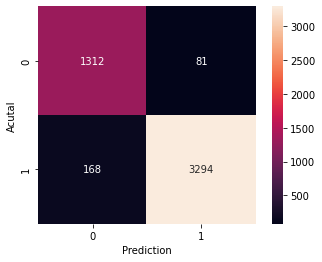

In [32]:
con_mat = confusion_matrix(test['ticket_type'], y_test_preds)
sns.heatmap(con_mat, annot=True, fmt='.0f', square=True)
plt.xlabel('Prediction')
plt.ylabel('Acutal')
plt.show()

In [33]:
acc = accuracy_score(test['ticket_type'], y_test_preds)
print(f'Model accuracy score = {acc*100:0.2f}%.')

Model accuracy score = 94.87%.


In [34]:
print(classification_report(test['ticket_type'], y_test_preds))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1393
           1       0.98      0.95      0.96      3462

    accuracy                           0.95      4855
   macro avg       0.93      0.95      0.94      4855
weighted avg       0.95      0.95      0.95      4855

